Nome: Francisco Jerônimo da Silva Júnior <br>
Matrícula: 433399

### Importação das bibliotecas

In [1]:
import pandas as pd # processamento de dados
import matplotlib.pyplot as plt # visualização de dados

# modelos de predição
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# métricas de avaliação
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# visualização de dados
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions

# divisão dos dados
from sklearn.model_selection import train_test_split

# configuração do modelo
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

### 1. Separe os dados em treino (80%) e teste (20%).

#### Leitura do dataset

In [2]:
df = pd.read_csv('../Lista-07/diabetes.csv')

#### Visão parcial do dataset

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Divisão das features e target

In [4]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

#### Divisão dos dados de treino e teste
- 70% para treino
- 30% para teste
- Divisão estratificada

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

### 2. Crie um modelo de árvore de decisão sobre o conjunto de treino e faça o que se pede:

#### Instanciação e treino do modelo

O GridSearch é utilizado para encontrar os melhores hyperparâmetros possíveis para o modelo

In [6]:
# definição dos parâmetros que serão testados
# vou testar níveis de profundidade diferentes para a árvore
params = {'max_depth' : range(2, 11)}

# instanciação do modelo de árvore
tree = DecisionTreeClassifier()

# instanciação do grid search
clf = GridSearchCV(tree, params, cv=10, scoring='f1')

# treino
clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(2, 11)}, pre_dispatch='2*n_jobs',

#### Valor do Hyperparâmetro com melhor scoring

In [7]:
clf.best_params_

{'max_depth': 5}

#### O melhor modelo é pego

In [8]:
tree2 = clf.best_estimator_

####  Calcule e mostre F1-Score sobre os dados de treino e sobre os dados de teste.

- Dados de treino

In [9]:
tree2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [10]:
y_pred = tree2.predict(X_train)
f1_score(y_train, y_pred)

0.7439024390243902

- Dados de teste

In [11]:
y_pred = tree2.predict(X_test)
f1_score(y_test, y_pred)

0.5760000000000001

#### Desenhe a árvore de decisão.

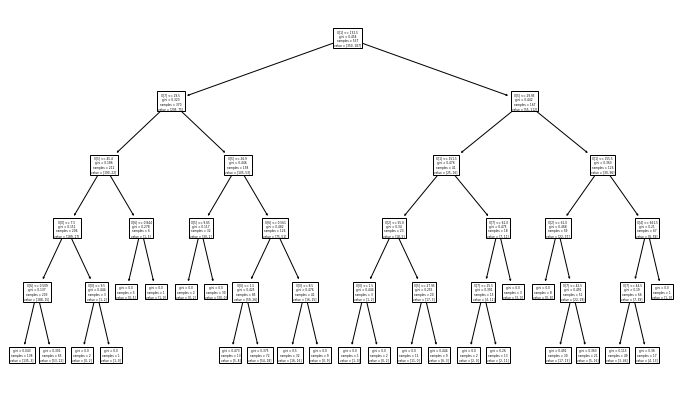

In [12]:
plt.figure(figsize=(12, 7))
plot_tree(tree2);

#### Importância das features.

In [13]:
pd.DataFrame({'Feature' :df.columns[:-1], 'Importance' :  tree2.feature_importances_}) \
.sort_values(by='Importance', ascending=False)

,Feature,Importance
1,Glucose,0.450782
5,BMI,0.203223
7,Age,0.143487
0,Pregnancies,0.087692
6,DiabetesPedigreeFunction,0.071421
2,BloodPressure,0.031064
4,Insulin,0.012331
3,SkinThickness,0.000000


#### Fronteira de decisão

É utilizado as duas features com maior importância para a classificação.

A função abaixo é utilizada para visualizar as fronteiras de decisão e tem como parâmetros algumas configurações que ajudam no ajuste do algoritmo aos dados.

Os parâmetros ajudam ou pioram a regularização do modelo.

In [14]:
def fronteiras(max_depth=None, max_leaf_nodes=None, min_samples_split=2, min_samples_leaf=1):
    # features com maior importância
    X_ = df[['Glucose', 'BMI']].values
    # target
    y_ = df['Outcome'].values
    
    # instanciação do modelo
    clf_ = DecisionTreeClassifier(max_depth=max_depth,max_leaf_nodes=max_leaf_nodes,\
                                  min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
    # treino do modelo
    clf_.fit(X_, y_)
    
    # configuração da visualização
    plt.figure(figsize=(10, 5))
    plt.xlabel('Glucose')
    plt.ylabel('BMI')
    plt.title('Decision Tree', fontsize=15)
    plot_decision_regions(X_, y_, clf_, legend=2);

#### Fronteiras sem restrições
Os quadrados azuis representam a classe 0 enquanto que os triângulos laranjas representam a classe 1.

Neste exemplo, a configuração padrão do modelo não é alterada.

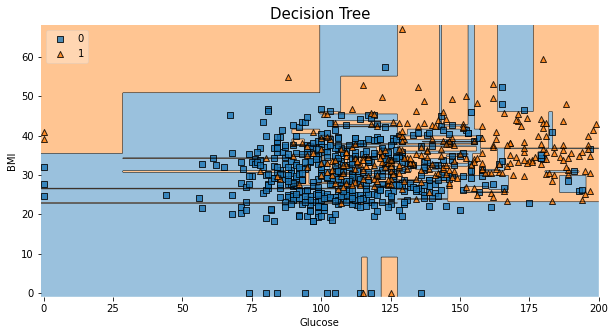

In [15]:
fronteiras()

O modelo está bem sobreajustado.

#### Fronteiras com restrição

Neste exemplo os nós folhas terão no mínimo 4 amostras.

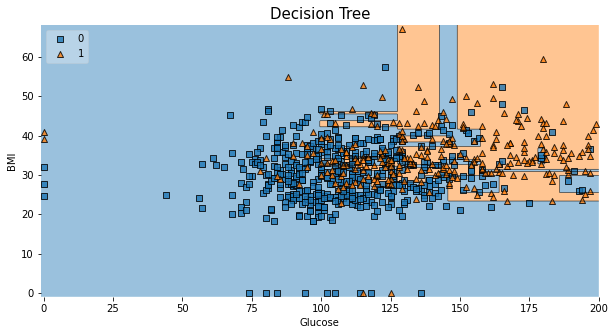

In [16]:
fronteiras(min_samples_leaf=4)

O modelo não se sobreajusta tanto, o que pode permitir uma melhor generalização posteriormente.

### 3. Crie um modelo ensemble de Votação (MajorityVoteClassifier) sobre o conjunto de treino usando pelo menos 3 algoritmos de aprendizado de máquina. Compare o resultado de usar os modelos isoladamente com o resultado usando o MajorityVoteClassifier sobre o conjunto de teste usando a métrica F1-Score.

#### Algotimos que serão utilizados
- Logistic Regression
- Random Forest
- Suporte Vector Machine

#### Instanciação dos modelos

In [17]:
# Logistic Regression
lg = LogisticRegression()

#Random Forest
rfr = RandomForestClassifier()

#Suporte Vector Machine
svc = SVC()

#### Majority Vote Classifier

In [18]:
voting = VotingClassifier(estimators=[('lg', lg), ('rfr', rfr), ('svc', svc)])

#### Treino, predição e comparação dos modelos

In [19]:
models_name = ('Logistic Regression', 'Random Forest', 'SVC', 'Voting Classifier')
models = (lg, rfr, svc, voting)

for clf, model_name in zip(models, models_name):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(model_name, 'f1_score:{:.5f} Acurácia:{:.5f}'.format(f1_score(y_test, y_pred),\
                                                               accuracy_score(y_test, y_pred)))

Logistic Regression f1_score:0.58333 Acurácia:0.74026
Random Forest f1_score:0.58904 Acurácia:0.74026
SVC f1_score:0.54962 Acurácia:0.74459
Voting Classifier f1_score:0.58571 Acurácia:0.74892


### 4. Avalie agora as técnicas de Bagging (BaggingClassifier) usando árvores de decisão (DecisionTreeClassifier), RandomForest, AdaBoost e GradientBoosting sobre o conjunto de teste usando a métrica F1-Score. Mostre também a importância das features para cada uma das técnicas.

#### Instanciação dos modelos

In [20]:
bag_classfi = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                               n_estimators=500)

random_forest = RandomForestClassifier(n_estimators=500, n_jobs=-1)

adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                            n_estimators=500)

GBC = GradientBoostingClassifier()

#### Treino e avaliação dos modelos

In [21]:
importance = {'Random Forest' : [], 'AdaBoost' : [], 'GradientBoosting' : []}

models = [random_forest, adaboost, GBC]

# faço o treino e predição separado por conta que o modelo
# não possue o atributo 'importances_'
bag_classfi.fit(X_train, y_train)
y_pred = bag_classfi.predict(X_test)
print('BaggingClassifier(Decision Tree) {:.5f}'.format(f1_score(y_test, y_pred)))

for model, model_name in zip(models, importance.keys()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    importance[model_name].extend(model.feature_importances_)
    print(model_name, 'f1_score:{:.5f} Acurácia:{:.5f}'.format(f1_score(y_test, y_pred),\
                                                               accuracy_score(y_test, y_pred)))

BaggingClassifier(Decision Tree) 0.60690
Random Forest f1_score:0.62162 Acurácia:0.75758
AdaBoost f1_score:0.62585 Acurácia:0.76190
GradientBoosting f1_score:0.61111 Acurácia:0.75758


#### Importância das features

In [22]:
df_importance = pd.DataFrame(importance)
df_importance.set_index(df.columns[:-1])

,Random Forest,AdaBoost,GradientBoosting
Pregnancies,0.095013,0.071035,0.050194
Glucose,0.261876,0.304629,0.407306
BloodPressure,0.089074,0.092416,0.036499
SkinThickness,0.068627,0.023898,0.016081
Insulin,0.073698,0.071305,0.052130
BMI,0.158774,0.198726,0.176277
DiabetesPedigreeFunction,0.125926,0.139040,0.122104
Age,0.127010,0.098952,0.139409
